In [1]:
import numpy as np
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
PATH = "Data/"

In [3]:
legal = pd.read_csv(PATH + "trust_in_legal_2013.csv")
police = pd.read_csv(PATH + "trust_in_police_2013.csv") 
politicts = pd.read_csv(PATH + "trust_in_politics_2013.csv") 

In [4]:
df = legal.merge(police,how='inner')
df = df.merge(politicts,how='inner')

In [5]:
average = []
counteries = []
for index, row in df.iterrows():
    legal = row[1]
    police = row[2]
    political = row[3]
    avg = np.round_(((legal+police+political)/3),decimals=2)
    average.append(avg)
    counteries.append(row[0])
d = {'country':counteries,'average':average}
d = pd.DataFrame(d)
df = df.merge(d,how='inner')
df

,country,legal_trust_rating,police_trust_rating,political_trust_rating,average
0,Belgium,5.0,6.100000,4.6,5.23
1,Bulgaria,3.0,3.600000,2.6,3.07
2,Czechia,3.8,4.900000,3.7,4.13
3,Denmark,7.5,7.900000,5.9,7.10
4,Germany,5.3,6.400000,4.9,5.53
5,Estonia,5.2,6.000000,4.4,5.20
6,Ireland,5.1,6.900000,3.2,5.07
7,Greece,4.1,5.000000,2.0,3.70
8,Spain,3.1,5.400000,1.9,3.47
9,France,4.5,5.600000,3.0,4.37


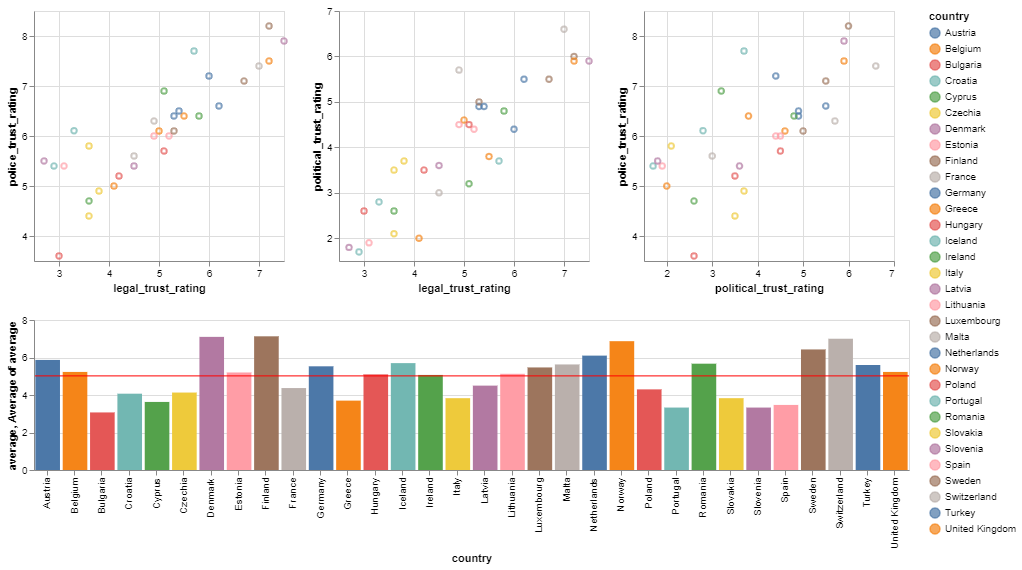

In [6]:
brush = alt.selection(type='interval')

lpo = alt.Chart(df).mark_point().encode(
    alt.X('legal_trust_rating:Q',scale=alt.Scale(zero=False)),
    alt.Y('police_trust_rating:Q',scale=alt.Scale(zero=False)),
    color=alt.condition(brush, 'country', alt.value('grey')),
    tooltip=['country', 'legal_trust_rating', 'police_trust_rating','average']
).properties(
    width=250,
    height=250,
    ).add_selection(brush)

lpol = alt.Chart(df).mark_point().encode(
    alt.X('legal_trust_rating:Q',scale=alt.Scale(zero=False)),
    alt.Y('political_trust_rating:Q',scale=alt.Scale(zero=False)),
    color=alt.condition(brush, 'country', alt.value('grey')),
    tooltip=['country', 'legal_trust_rating', 'political_trust_rating','average']
).properties(
    width=250,
    height=250).add_selection(brush)

pp = alt.Chart(df).mark_point().encode(
    alt.X('political_trust_rating:Q',scale=alt.Scale(zero=False)),
    alt.Y('police_trust_rating:Q',scale=alt.Scale(zero=False)),
    color=alt.condition(brush, 'country', alt.value('grey')),
    tooltip=['country', 'political_trust_rating', 'police_trust_rating','average']
).properties(
    width=250,
    height=250).add_selection(brush)

bar = alt.Chart(df).mark_bar().encode(
    x='country:O',
    y='average:Q',
    color=alt.condition(brush, 'country', alt.value('grey')),
    tooltip=['country', 'legal_trust_rating', 'political_trust_rating', 'police_trust_rating','average']
).properties(
    height=150,
    width = 875
).add_selection(brush)

rule = alt.Chart(df).mark_rule(color='red').encode(
    y='average(average):Q'
).transform_filter(
    brush
)


(lpo|lpol|pp)&(bar+rule)